In [99]:
import numpy as np
import pandas as pd
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [100]:
df = pd.DataFrame()

df['x1'] = [1,2,3,4,5,6,6,7,9,9]
df['x2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [101]:
df

,x1,x2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='x1', ylabel='x2'>

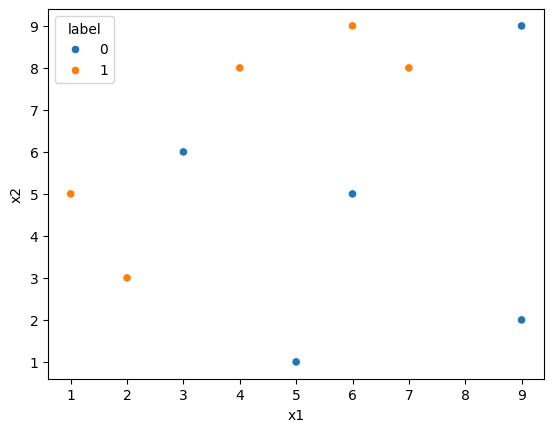

In [102]:
import seaborn as sns
sns.scatterplot(data=df, x='x1', y='x2', hue='label')

In [103]:
def calculate_alpha(error):
  return 0.5 * np.log((1-error)/(error + 0.000000001))

def calculate_error(df):
  return df[df['y_pred'] != df['label']]['weights'].sum()

def update_weights(df, alpha):
  for index, row in df.iterrows():
    if row['y_pred'] == row['label']:
        df.at[index, 'updated_weights'] = row['weights'] * np.exp(-alpha)
    else:
        df.at[index, 'updated_weights'] = row['weights'] * np.exp(alpha)

def normalize_weights(df):
  df['normalized_weights'] = df['updated_weights'] / df['updated_weights'].sum()

def create_new_df(df):
  index = []

  for i in range(df.shape[0]):
    num = np.random.random()
    for j, row in df.iterrows():
      if num >= row['cumsum_lower'] and num <= row['cumsum_upper']:
        index.append(j)
  return df.iloc[index, [0,1,2,3]]

In [112]:
def adaboost(df, estimators):
  alphas = []
  res = []

  for i in range(estimators):
    df['weights'] = 1/df.shape[0]
    print(df)

    dt = DecisionTreeClassifier(max_depth=1)
    X = df.iloc[:, 0:2]
    y = df.iloc[:, 2]
    dt.fit(X, y)
    plot_tree(dt)
    plot_decision_regions(X.values, y.values, clf=dt, legend=2)

    df['y_pred'] = dt.predict(X)
    print(df)

    alpha = calculate_alpha(calculate_error(df))
    alphas.append(alpha)

    update_weights(df, alpha)
    print(df)

    normalize_weights(df)
    print(df)

    df["cumsum_upper"] = np.cumsum(df['normalized_weights'])
    df["cumsum_lower"] = df["cumsum_upper"] - df['normalized_weights']
    print(df)

    df = create_new_df(df)
    print(df)

    res.append(dt.predict(np.array([df.iloc[0,0], df.iloc[0,1]]).reshape(1,2)))

    print("***************************************************************")

  print(res)

  cost = 0
  for i in range(len(res)):
    cost += alphas[i] * res[i][0]

  print("Cost : ", cost)

  if cost >= 0:
    print("Predicted Class: 1")
  else:
    print("Predicted Class: -1")

   x1  x2  label  weights  y_pred  updated_weights  normalized_weights  \
0   1   5      1      0.1       1         0.065465            0.071429   
1   2   3      1      0.1       1         0.065465            0.071429   
2   3   6      0      0.1       0         0.065465            0.071429   
3   4   8      1      0.1       0         0.152753            0.166667   
4   5   1      0      0.1       0         0.065465            0.071429   
5   6   9      1      0.1       0         0.152753            0.166667   
6   6   5      0      0.1       0         0.065465            0.071429   
7   7   8      1      0.1       0         0.152753            0.166667   
8   9   9      0      0.1       0         0.065465            0.071429   
9   9   2      0      0.1       0         0.065465            0.071429   

   cumsum_upper  cumsum_lower  
0      0.071429      0.000000  
1      0.142857      0.071429  
2      0.214286      0.142857  
3      0.380952      0.214286  
4      0.452381      0.38

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


   x1  x2  label  weights  y_pred  updated_weights  normalized_weights  \
0   1   5      1      0.1       1         0.065465            0.071429   
1   2   3      1      0.1       1         0.065465            0.071429   
2   3   6      0      0.1       0         0.065465            0.071429   
3   4   8      1      0.1       0         0.152753            0.166667   
4   5   1      0      0.1       0         0.065465            0.071429   
5   6   9      1      0.1       0         0.152753            0.166667   
6   6   5      0      0.1       0         0.065465            0.071429   
7   7   8      1      0.1       0         0.152753            0.166667   
8   9   9      0      0.1       0         0.065465            0.071429   
9   9   2      0      0.1       0         0.065465            0.071429   

   cumsum_upper  cumsum_lower  
0      0.071429      0.000000  
1      0.142857      0.071429  
2      0.214286      0.142857  
3      0.380952      0.214286  
4      0.452381      0.38

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


   x1  x2  label  weights  y_pred
5   6   9      1      0.1       1
9   9   2      0      0.1       0
3   4   8      1      0.1       1
1   2   3      1      0.1       1
4   5   1      0      0.1       0
5   6   9      1      0.1       1
3   4   8      1      0.1       1
7   7   8      1      0.1       1
3   4   8      1      0.1       1
1   2   3      1      0.1       1
   x1  x2  label  weights  y_pred  updated_weights
5   6   9      1      0.1       1         0.000003
9   9   2      0      0.1       0         0.000003
3   4   8      1      0.1       1         0.000003
1   2   3      1      0.1       1         0.000003
4   5   1      0      0.1       0         0.000003
5   6   9      1      0.1       1         0.000003
3   4   8      1      0.1       1         0.000003
7   7   8      1      0.1       1         0.000003
3   4   8      1      0.1       1         0.000003
1   2   3      1      0.1       1         0.000003
   x1  x2  label  weights  y_pred  updated_weights  normalized_we

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


   x1  x2  label  weights  y_pred
5   6   9      1      0.1       1
9   9   2      0      0.1       0
9   9   2      0      0.1       0
9   9   2      0      0.1       0
5   6   9      1      0.1       1
5   6   9      1      0.1       1
5   6   9      1      0.1       1
1   2   3      1      0.1       1
5   6   9      1      0.1       1
9   9   2      0      0.1       0
   x1  x2  label  weights  y_pred  updated_weights
5   6   9      1      0.1       1         0.000003
9   9   2      0      0.1       0         0.000003
9   9   2      0      0.1       0         0.000003
9   9   2      0      0.1       0         0.000003
5   6   9      1      0.1       1         0.000003
5   6   9      1      0.1       1         0.000003
5   6   9      1      0.1       1         0.000003
1   2   3      1      0.1       1         0.000003
5   6   9      1      0.1       1         0.000003
9   9   2      0      0.1       0         0.000003
   x1  x2  label  weights  y_pred  updated_weights  normalized_we

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


   x1  x2  label  weights  y_pred
9   9   2      0      0.1       0
9   9   2      0      0.1       0
5   6   9      1      0.1       1
9   9   2      0      0.1       0
9   9   2      0      0.1       0
9   9   2      0      0.1       0
5   6   9      1      0.1       1
9   9   2      0      0.1       0
5   6   9      1      0.1       1
5   6   9      1      0.1       1
   x1  x2  label  weights  y_pred  updated_weights
9   9   2      0      0.1       0         0.000003
9   9   2      0      0.1       0         0.000003
5   6   9      1      0.1       1         0.000003
9   9   2      0      0.1       0         0.000003
9   9   2      0      0.1       0         0.000003
9   9   2      0      0.1       0         0.000003
5   6   9      1      0.1       1         0.000003
9   9   2      0      0.1       0         0.000003
5   6   9      1      0.1       1         0.000003
5   6   9      1      0.1       1         0.000003
   x1  x2  label  weights  y_pred  updated_weights  normalized_we

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


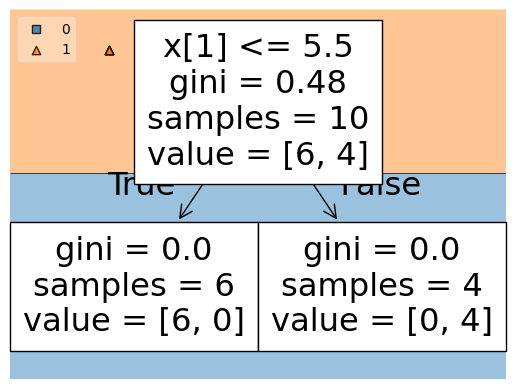

In [116]:
adaboost(df, 4)

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [121]:
np.random.seed(42)
X, y = make_circles(n_samples=500,
                  noise=0.35,
                  factor=0.1,
                  random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

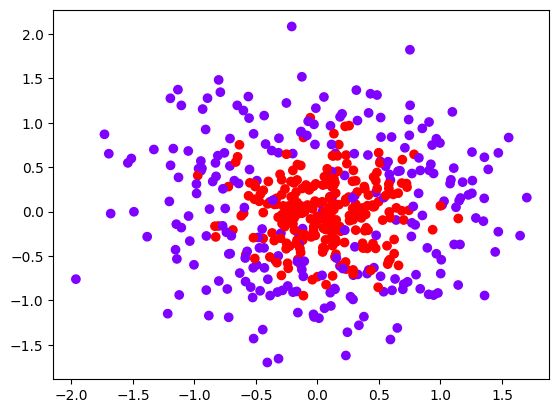

In [129]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow')

In [ ]:
def plot_decision_boundary(clf, X, y):
  x_range = np.linspace(X.min(), X.max(), 100)
  xx1, xx2 = np.meshgrid(x_range, x_range)

  y_pred = clf.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)

  plt.figure(figsize=(12,8))
  plt.contourf(xx1, xx2, y_pred, alpha=0.2, cmap='viridis')
  plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis')

In [125]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

clf = AdaBoostClassifier()

np.mean(cross_val_score(clf, X, y, scoring="accuracy", cv=10))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

0.786

In [126]:
clf.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

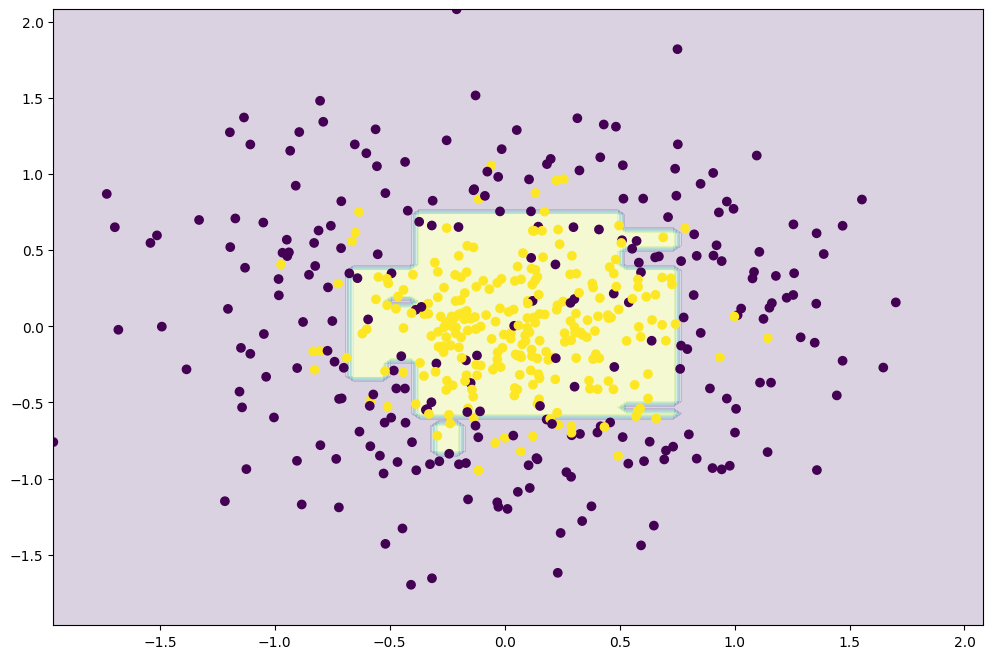

In [130]:
plot_decision_boundary(clf, X, y)